In [183]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16, 7]

# sns.set( font_scale = 2, style = 'whitegrid',rc = {'figure.figsize':(20,7)})

/kaggle/input/fifa-world-cup-2022-complete-dataset/Fifa_world_cup_matches.csv


# **STEP 1**

**Reading data**

* *Let's read our data and look at them*

In [184]:
df = pd.read_csv('/kaggle/input/fifa-world-cup-2022-complete-dataset/Fifa_world_cup_matches.csv')

In [185]:
df.head(5)

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [186]:
df.columns

Index(['team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest', 'number of goals team1',
       'number of goals team2', 'date', 'hour', 'category',
       'total attempts team1', 'total attempts team2', 'conceded team1',
       'conceded team2', 'goal inside the penalty area team1',
       'goal inside the penalty area team2',
       'goal outside the penalty area team1',
       'goal outside the penalty area team2', 'assists team1', 'assists team2',
       'on target attempts team1', 'on target attempts team2',
       'off target attempts team1', 'off target attempts team2',
       'attempts inside the penalty area team1',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team1',
       'attempts outside the penalty area  team2', 'left channel team1',
       'left channel team2', 'left inside channel team1',
       'left inside channel team2', 'central channel team1',
       'central channel team2', 'right in

# **STEP 2**

**Preparing of data**

* *Let's choose the columns that we need to our research*




In [187]:
df_all =  df[['team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest', 'number of goals team1',
       'number of goals team2', 'date', 'hour', 'category',
       'total attempts team1', 'total attempts team2', 'assists team1', 'assists team2',
       'on target attempts team1', 'on target attempts team2',
       'off target attempts team1', 'off target attempts team2',
       'receptions between midfield and defensive lines team1',
       'receptions between midfield and defensive lines team2',
       'yellow cards team1',
       'yellow cards team2', 'red cards team1', 'red cards team2',
       'fouls against team1', 'fouls against team2', 'offsides team1',
       'offsides team2', 'passes team1', 'passes team2',
       'passes completed team1', 'passes completed team2',
       'corners team1', 'corners team2', 'free kicks team1',
       'free kicks team2', 'penalties scored team1', 'penalties scored team2',
       'own goals team1',
       'own goals team2', 'forced turnovers team1', 'forced turnovers team2',
       'defensive pressures applied team1',
       'defensive pressures applied team2']].copy()


In [188]:
df_all.dtypes

team1                                                    object
team2                                                    object
possession team1                                         object
possession team2                                         object
possession in contest                                    object
number of goals team1                                     int64
number of goals team2                                     int64
date                                                     object
hour                                                     object
category                                                 object
total attempts team1                                      int64
total attempts team2                                      int64
assists team1                                             int64
assists team2                                             int64
on target attempts team1                                  int64
on target attempts team2                

* *I think we should replace all spaces from our column titles*
* *It will help us to avoid some problems in future analysis*

In [189]:
df_all.columns = df_all.columns.str.replace(" ", "_")
df_all.columns

Index(['team1', 'team2', 'possession_team1', 'possession_team2',
       'possession_in_contest', 'number_of_goals_team1',
       'number_of_goals_team2', 'date', 'hour', 'category',
       'total_attempts_team1', 'total_attempts_team2', 'assists_team1',
       'assists_team2', 'on_target_attempts_team1', 'on_target_attempts_team2',
       'off_target_attempts_team1', 'off_target_attempts_team2',
       'receptions_between_midfield_and_defensive_lines_team1',
       'receptions_between_midfield_and_defensive_lines_team2',
       'yellow_cards_team1', 'yellow_cards_team2', 'red_cards_team1',
       'red_cards_team2', 'fouls_against_team1', 'fouls_against_team2',
       'offsides_team1', 'offsides_team2', 'passes_team1', 'passes_team2',
       'passes_completed_team1', 'passes_completed_team2', 'corners_team1',
       'corners_team2', 'free_kicks_team1', 'free_kicks_team2',
       'penalties_scored_team1', 'penalties_scored_team2', 'own_goals_team1',
       'own_goals_team2', 'forced_turn

* *Continue preparing. I'd like to change the type of our date column*

In [190]:
df_all.date = pd.to_datetime(df_all.date)


In [191]:
df_all.head()

,team1,team2,possession_team1,possession_team2,possession_in_contest,number_of_goals_team1,number_of_goals_team2,date,hour,category,...,free_kicks_team1,free_kicks_team2,penalties_scored_team1,penalties_scored_team2,own_goals_team1,own_goals_team2,forced_turnovers_team1,forced_turnovers_team2,defensive_pressures_applied_team1,defensive_pressures_applied_team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,2022-11-20,17 : 00,Group A,...,19,17,0,1,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,2022-11-21,14 : 00,Group B,...,16,10,0,1,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,2022-11-21,17 : 00,Group A,...,14,14,0,0,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,2022-11-21,20 : 00,Group B,...,11,15,0,1,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,2022-11-22,11 : 00,Group C,...,22,16,1,0,0,0,65,80,163,361


* *Also I noticed that if we want to make some aggregations with our information about possessions we should replace a percentage sign and change a columns type to numeric*

In [192]:
df_all.possession_team1 = df_all.possession_team1.apply(lambda x: x.replace("%",''))
df_all.possession_team2 = df_all.possession_team2.apply(lambda x: x.replace("%",''))
df_all.possession_in_contest = df_all.possession_in_contest.apply(lambda x: x.replace("%",''))

In [193]:
df_all.possession_team1 = pd.to_numeric(df_all.possession_team1)
df_all.possession_team2 = pd.to_numeric(df_all.possession_team2)
df_all.possession_in_contest = pd.to_numeric(df_all.possession_in_contest)

In [194]:
df_all.head()

,team1,team2,possession_team1,possession_team2,possession_in_contest,number_of_goals_team1,number_of_goals_team2,date,hour,category,...,free_kicks_team1,free_kicks_team2,penalties_scored_team1,penalties_scored_team2,own_goals_team1,own_goals_team2,forced_turnovers_team1,forced_turnovers_team2,defensive_pressures_applied_team1,defensive_pressures_applied_team2
0,QATAR,ECUADOR,42,50,8,0,2,2022-11-20,17 : 00,Group A,...,19,17,0,1,0,0,52,72,256,279
1,ENGLAND,IRAN,72,19,9,6,2,2022-11-21,14 : 00,Group B,...,16,10,0,1,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44,45,11,0,2,2022-11-21,17 : 00,Group A,...,14,14,0,0,0,0,63,73,263,251
3,UNITED STATES,WALES,51,39,10,1,1,2022-11-21,20 : 00,Group B,...,11,15,0,1,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64,24,12,1,2,2022-11-22,11 : 00,Group C,...,22,16,1,0,0,0,65,80,163,361


# STEP 3

***Ok, it seems that our data is ready to analysis. Let's create a questions list for our research***

Directions for analysis:

* Teams goals and passes. Passes accuracy
* The relationship between ball possession and game result
* Offsides, red and yellow card statistic
* Compare of teams playing styles
* The accumulated wearness influence on teams statistic*



***Teams goals and passes. Passes accuracy***

In [195]:
home_goals = df_all.groupby('team1') \
    .agg({"number_of_goals_team1":"sum",
          'total_attempts_team1' : "sum",
          'assists_team1' : "sum",
          'on_target_attempts_team1' : "sum",
          'off_target_attempts_team1' : "sum"}) \
    .reset_index()
home_goals.head()

,team1,number_of_goals_team1,total_attempts_team1,assists_team1,on_target_attempts_team1,off_target_attempts_team1
0,ARGENTINA,11,64,5,29,26
1,AUSTRALIA,1,8,1,4,2
2,BELGIUM,1,19,1,7,12
3,BRAZIL,7,51,5,24,19
4,CAMEROON,4,20,4,11,6


In [196]:
away_goals = df_all.groupby('team2') \
    .agg({"number_of_goals_team2":"sum",
          'total_attempts_team2' : "sum",
          'assists_team2' : "sum",
          'on_target_attempts_team2' : "sum",
          'off_target_attempts_team2' : "sum"}) \
    .reset_index()
away_goals.head()

,team2,number_of_goals_team2,total_attempts_team2,assists_team2,on_target_attempts_team2,off_target_attempts_team2
0,ARGENTINA,4,40,3,19,16
1,AUSTRALIA,3,17,2,5,8
2,BELGIUM,0,15,0,4,7
3,BRAZIL,1,39,1,17,15
4,CAMEROON,0,7,0,3,2


In [197]:
total_goals = home_goals.merge(away_goals, left_on = 'team1', right_on = 'team2' )
total_goals.head()

,team1,number_of_goals_team1,total_attempts_team1,assists_team1,on_target_attempts_team1,off_target_attempts_team1,team2,number_of_goals_team2,total_attempts_team2,assists_team2,on_target_attempts_team2,off_target_attempts_team2
0,ARGENTINA,11,64,5,29,26,ARGENTINA,4,40,3,19,16
1,AUSTRALIA,1,8,1,4,2,AUSTRALIA,3,17,2,5,8
2,BELGIUM,1,19,1,7,12,BELGIUM,0,15,0,4,7
3,BRAZIL,7,51,5,24,19,BRAZIL,1,39,1,17,15
4,CAMEROON,4,20,4,11,6,CAMEROON,0,7,0,3,2


In [198]:
total_goals  = total_goals.drop('team2', axis=1)
total_goals.head()

,team1,number_of_goals_team1,total_attempts_team1,assists_team1,on_target_attempts_team1,off_target_attempts_team1,number_of_goals_team2,total_attempts_team2,assists_team2,on_target_attempts_team2,off_target_attempts_team2
0,ARGENTINA,11,64,5,29,26,4,40,3,19,16
1,AUSTRALIA,1,8,1,4,2,3,17,2,5,8
2,BELGIUM,1,19,1,7,12,0,15,0,4,7
3,BRAZIL,7,51,5,24,19,1,39,1,17,15
4,CAMEROON,4,20,4,11,6,0,7,0,3,2


In [199]:
total_goals = total_goals \
    .rename(columns={"number_of_goals_team1":"home_goals",
                     "number_of_goals_team2":"away_goals",
                     "total_attempts_team1" : "home_attempts_total",
                     "on_target_attempts_team1" : "home_attempts_on_target",
                     "off_target_attempts_team1" : "home_attempts_off_target",
                     "assists_team1" : "home_assists",
                     "total_attempts_team2" : "away_attempts_total",
                     "on_target_attempts_team2" : "away_attempts_on_target",
                     "off_target_attempts_team2" : "away_attempts_off_target",
                     "assists_team2" : "away_assists",
                     "team1" : "team"
                    })
total_goals = total_goals.assign(total_goals  = total_goals.home_goals + total_goals.away_goals)
total_goals = total_goals.assign(total_assists  = total_goals.home_assists + total_goals.away_assists)
total_goals = total_goals.assign(total_attempts  = total_goals.home_attempts_total + total_goals.away_attempts_total)
total_goals = total_goals.assign(total_attempts_on_target  = total_goals.home_attempts_on_target + total_goals.away_attempts_on_target)
total_goals = total_goals.assign(total_attempts_off_target  = total_goals.home_attempts_off_target + total_goals.away_attempts_off_target)
total_goals.head()

,team,home_goals,home_attempts_total,home_assists,home_attempts_on_target,home_attempts_off_target,away_goals,away_attempts_total,away_assists,away_attempts_on_target,away_attempts_off_target,total_goals,total_assists,total_attempts,total_attempts_on_target,total_attempts_off_target
0,ARGENTINA,11,64,5,29,26,4,40,3,19,16,15,8,104,48,42
1,AUSTRALIA,1,8,1,4,2,3,17,2,5,8,4,3,25,9,10
2,BELGIUM,1,19,1,7,12,0,15,0,4,7,1,1,34,11,19
3,BRAZIL,7,51,5,24,19,1,39,1,17,15,8,6,90,41,34
4,CAMEROON,4,20,4,11,6,0,7,0,3,2,4,4,27,14,8


In [200]:
total_goals.columns

Index(['team', 'home_goals', 'home_attempts_total', 'home_assists',
       'home_attempts_on_target', 'home_attempts_off_target', 'away_goals',
       'away_attempts_total', 'away_assists', 'away_attempts_on_target',
       'away_attempts_off_target', 'total_goals', 'total_assists',
       'total_attempts', 'total_attempts_on_target',
       'total_attempts_off_target'],
      dtype='object')

In [201]:
total_goals = total_goals[['team', 'total_goals','home_goals', 'away_goals', 
                           'total_assists', 'home_assists', 'away_assists',
                           'total_attempts', 'home_attempts_total', 'away_attempts_total',
                           'total_attempts_on_target', 'home_attempts_on_target', 'away_attempts_on_target',
                           'total_attempts_off_target', 'home_attempts_off_target', 'away_attempts_off_target']].set_index('team')

In [202]:
top_7_total_goals = total_goals.sort_values('total_goals',ascending=False).head(7)
top_7_total_goals

,total_goals,home_goals,away_goals,total_assists,home_assists,away_assists,total_attempts,home_attempts_total,away_attempts_total,total_attempts_on_target,home_attempts_on_target,away_attempts_on_target,total_attempts_off_target,home_attempts_off_target,away_attempts_off_target
team,,,,,,,,,,,,,,,
FRANCE,16,11,5,12,9,3,101,73,28,35,22,13,42,32,10
ARGENTINA,15,11,4,8,5,3,104,64,40,48,29,19,42,26,16
ENGLAND,13,10,3,11,9,2,60,43,17,27,20,7,21,15,6
PORTUGAL,12,11,1,8,7,1,62,39,23,25,18,7,24,12,12
NETHERLANDS,10,8,2,8,7,1,40,31,9,16,13,3,17,12,5
SPAIN,9,8,1,6,5,1,51,24,27,16,10,6,21,12,9
BRAZIL,8,7,1,6,5,1,90,51,39,41,24,17,34,19,15


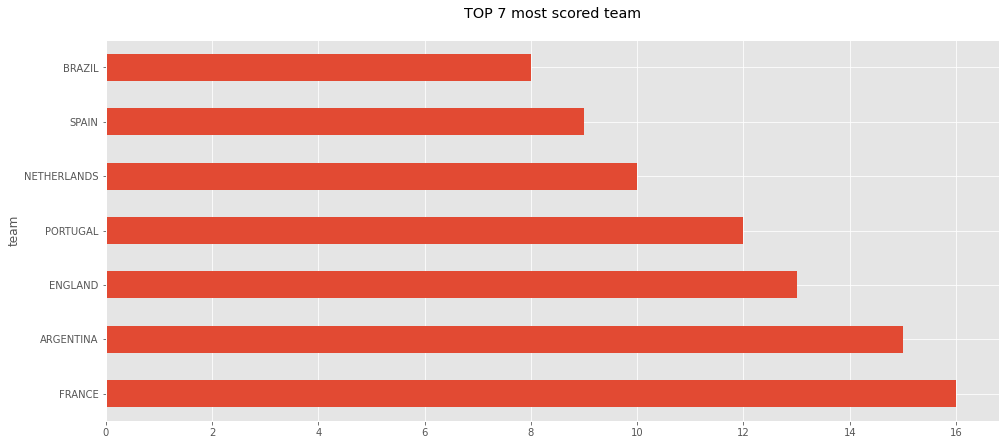

In [203]:
top_7_total_goals.total_goals.plot(kind = 'barh', title = 'TOP 7 most scored team\n')
plt.show()

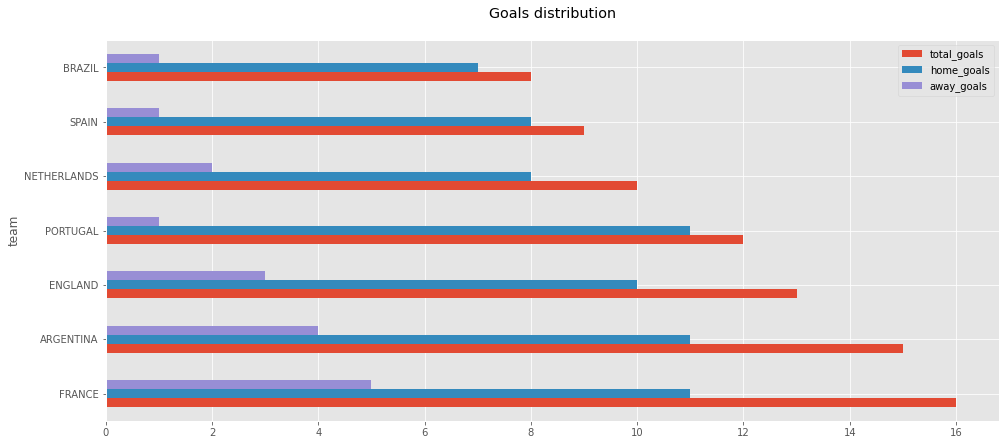

In [204]:
top_7_total_goals[['total_goals', 'home_goals', 'away_goals']].plot(kind="barh", title = 'Goals distribution\n')
plt.show()

*It's interesting to notice that despite the fact that all matches were in Qatar and teams did not have the advantage of their own field(except Qatar team)  whatever most goals by top-teams were scored when they played their "home" matches.*

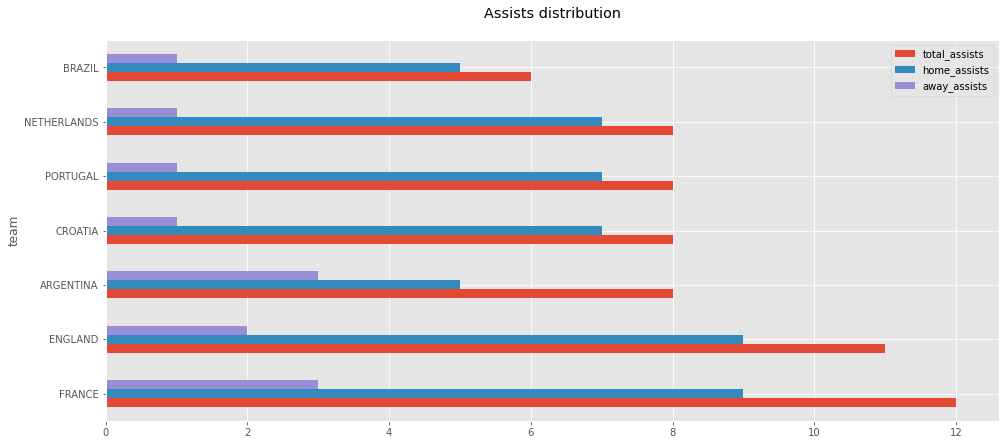

In [205]:
top_7_total_assists = total_goals.sort_values('total_assists',ascending=False).head(7)
top_7_total_assists[['total_assists', 'home_assists', 'away_assists']].plot(kind="barh", title = 'Assists distribution\n')
plt.show()

*The same story with assists!*

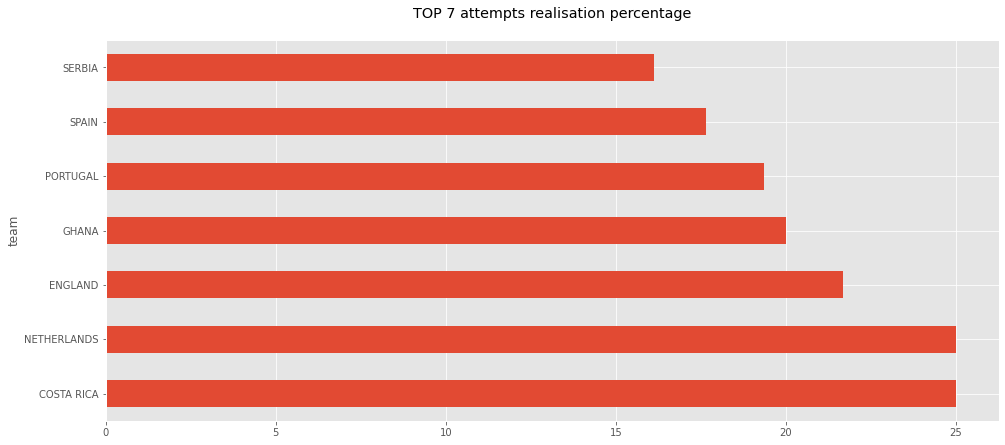

In [206]:
(total_goals.total_goals / total_goals.total_attempts * 100) \
    .round(2) \
    .sort_values(ascending=False) \
    .head(7) \
    .plot(kind='barh', title = 'TOP 7 attempts realisation percentage\n')
plt.show()

In [207]:
df_all.columns

Index(['team1', 'team2', 'possession_team1', 'possession_team2',
       'possession_in_contest', 'number_of_goals_team1',
       'number_of_goals_team2', 'date', 'hour', 'category',
       'total_attempts_team1', 'total_attempts_team2', 'assists_team1',
       'assists_team2', 'on_target_attempts_team1', 'on_target_attempts_team2',
       'off_target_attempts_team1', 'off_target_attempts_team2',
       'receptions_between_midfield_and_defensive_lines_team1',
       'receptions_between_midfield_and_defensive_lines_team2',
       'yellow_cards_team1', 'yellow_cards_team2', 'red_cards_team1',
       'red_cards_team2', 'fouls_against_team1', 'fouls_against_team2',
       'offsides_team1', 'offsides_team2', 'passes_team1', 'passes_team2',
       'passes_completed_team1', 'passes_completed_team2', 'corners_team1',
       'corners_team2', 'free_kicks_team1', 'free_kicks_team2',
       'penalties_scored_team1', 'penalties_scored_team2', 'own_goals_team1',
       'own_goals_team2', 'forced_turn

In [208]:
passes = df_all[['team1', 'team2','date', 'passes_team1', 'passes_team2',
       'passes_completed_team1', 'passes_completed_team2']]
passes.head()

,team1,team2,date,passes_team1,passes_team2,passes_completed_team1,passes_completed_team2
0,QATAR,ECUADOR,2022-11-20,450,480,381,409
1,ENGLAND,IRAN,2022-11-21,809,224,730,154
2,SENEGAL,NETHERLANDS,2022-11-21,383,438,313,374
3,UNITED STATES,WALES,2022-11-21,569,409,509,321
4,ARGENTINA,SAUDI ARABIA,2022-11-22,610,267,529,190


*Let's explore team passes and accuracy*

In [209]:
home_passes = passes.groupby('team1',as_index=False) \
    .agg({"passes_team1" : "sum",
          "passes_completed_team1" : "sum"}) \
    .rename(columns={"team1":"team",
                    "passes_team1":"home_passes_total",
                    "passes_completed_team1":"home_passes_complete_total"}) \
    .assign(home_accuracy = home_passes.home_passes_complete_total / home_passes.home_passes_total * 100).round(2)
                  
home_passes.head()

,team,home_passes_total,home_passes_complete_total,home_accuracy
0,ARGENTINA,2910,2516,86.46
1,AUSTRALIA,286,187,65.38
2,BELGIUM,1183,1037,87.66
3,BRAZIL,1766,1580,89.47
4,CAMEROON,659,510,77.39


In [210]:
away_passes = passes.groupby('team2',as_index=False) \
    .agg({"passes_team2" : "sum",
          "passes_completed_team2" : "sum"}) \
    .rename(columns={"team2":"team",
                    "passes_team2":"away_passes_total",
                    "passes_completed_team2":"away_passes_complete_total"}) \
    .assign(away_accuracy = away_passes.away_passes_complete_total / away_passes.away_passes_total * 100).round(2)
                  
away_passes.head()

,team,away_passes_total,away_passes_complete_total,away_accuracy
0,ARGENTINA,1465,1325,90.44
1,AUSTRALIA,1250,1019,81.52
2,BELGIUM,596,531,89.09
3,BRAZIL,1243,1116,89.78
4,CAMEROON,500,424,84.80


In [211]:
total_passes = home_passes.merge(away_passes, on = 'team')
total_passes.head()

,team,home_passes_total,home_passes_complete_total,home_accuracy,away_passes_total,away_passes_complete_total,away_accuracy
0,ARGENTINA,2910,2516,86.46,1465,1325,90.44
1,AUSTRALIA,286,187,65.38,1250,1019,81.52
2,BELGIUM,1183,1037,87.66,596,531,89.09
3,BRAZIL,1766,1580,89.47,1243,1116,89.78
4,CAMEROON,659,510,77.39,500,424,84.80


In [212]:
total_passes = total_passes \
    .assign(total_passes  = total_passes.home_passes_total + total_passes.away_passes_total)
total_passes = total_passes \
    .assign(total_complete_passes  = total_passes.home_passes_complete_total + total_passes.away_passes_complete_total)
total_passes = total_passes \
    .assign(total_accuracy  = (total_passes.home_accuracy + total_passes.away_accuracy) / 2)

total_passes.head()

,team,home_passes_total,home_passes_complete_total,home_accuracy,away_passes_total,away_passes_complete_total,away_accuracy,total_passes,total_complete_passes,total_accuracy
0,ARGENTINA,2910,2516,86.46,1465,1325,90.44,4375,3841,88.450
1,AUSTRALIA,286,187,65.38,1250,1019,81.52,1536,1206,73.450
2,BELGIUM,1183,1037,87.66,596,531,89.09,1779,1568,88.375
3,BRAZIL,1766,1580,89.47,1243,1116,89.78,3009,2696,89.625
4,CAMEROON,659,510,77.39,500,424,84.80,1159,934,81.095


In [213]:
total_passes.columns

Index(['team', 'home_passes_total', 'home_passes_complete_total',
       'home_accuracy', 'away_passes_total', 'away_passes_complete_total',
       'away_accuracy', 'total_passes', 'total_complete_passes',
       'total_accuracy'],
      dtype='object')

In [214]:
total_passes = total_passes [['team', 'total_passes', 'home_passes_total', 'away_passes_total',
                              'total_complete_passes', 'home_passes_complete_total', 'away_passes_complete_total',
                              'total_accuracy', 'home_accuracy', 'away_accuracy',]]
total_passes.head()

,team,total_passes,home_passes_total,away_passes_total,total_complete_passes,home_passes_complete_total,away_passes_complete_total,total_accuracy,home_accuracy,away_accuracy
0,ARGENTINA,4375,2910,1465,3841,2516,1325,88.450,86.46,90.44
1,AUSTRALIA,1536,286,1250,1206,187,1019,73.450,65.38,81.52
2,BELGIUM,1779,1183,596,1568,1037,531,88.375,87.66,89.09
3,BRAZIL,3009,1766,1243,2696,1580,1116,89.625,89.47,89.78
4,CAMEROON,1159,659,500,934,510,424,81.095,77.39,84.80


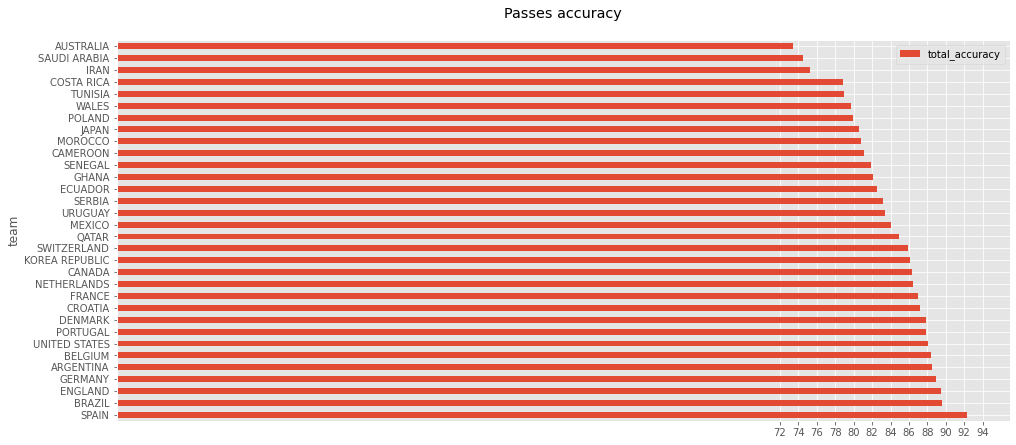

In [215]:
total_passes.sort_values(by = 'total_accuracy', ascending=False)[['team', 'total_accuracy']] \
    .set_index('team') \
    .plot(kind='barh', title = 'Passes accuracy\n')
plt.xticks(range(72,96,2))
plt.show()

* We can see that Spain is a leader in the passes accuracy statistic with big difference from second place
* Also I noticed that semi-finalist Morocco team have only 81% of accuracy*

**The relationship between ball possession and game result**